# Predicting Credit Card Approvals

As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. 

- First, there is class imbalance; there are fewer examples of loans not fully paid. 
- Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. 

- Your manager will want to know how you accounted for this in training and evaluation your model.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

### Initial data Inspection


#### Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   


In [2]:
loan = pd.read_csv('/Users/mikkelpedersen/Desktop/project vs studio/ML projekter/loan_data.csv')
loan.head()
loan_copy = loan.copy()

In [3]:
print('The size of the dataset', loan.size)
print('This is the shape of the dataset: ', loan.shape)
loan.info()

The size of the dataset 134092
This is the shape of the dataset:  (9578, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory u

In [4]:
loan.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
def suma(data):
    for col in data[['purpose', 'credit.policy']]:
        print(data[col].value_counts())
        print('****' * 8)
        
def missing(data):
    mis = round(data.isnull().sum() * 100 / len(data), 2)
    print('The amount of missing values in the dataset')
    print(mis)
    print('****' * 8)

In [6]:
missing(loan)

The amount of missing values in the dataset
credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64
********************************


In [7]:
suma(loan)

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64
********************************
credit.policy
1    7710
0    1868
Name: count, dtype: int64
********************************


## EDA (Exploratory Data Analysis)

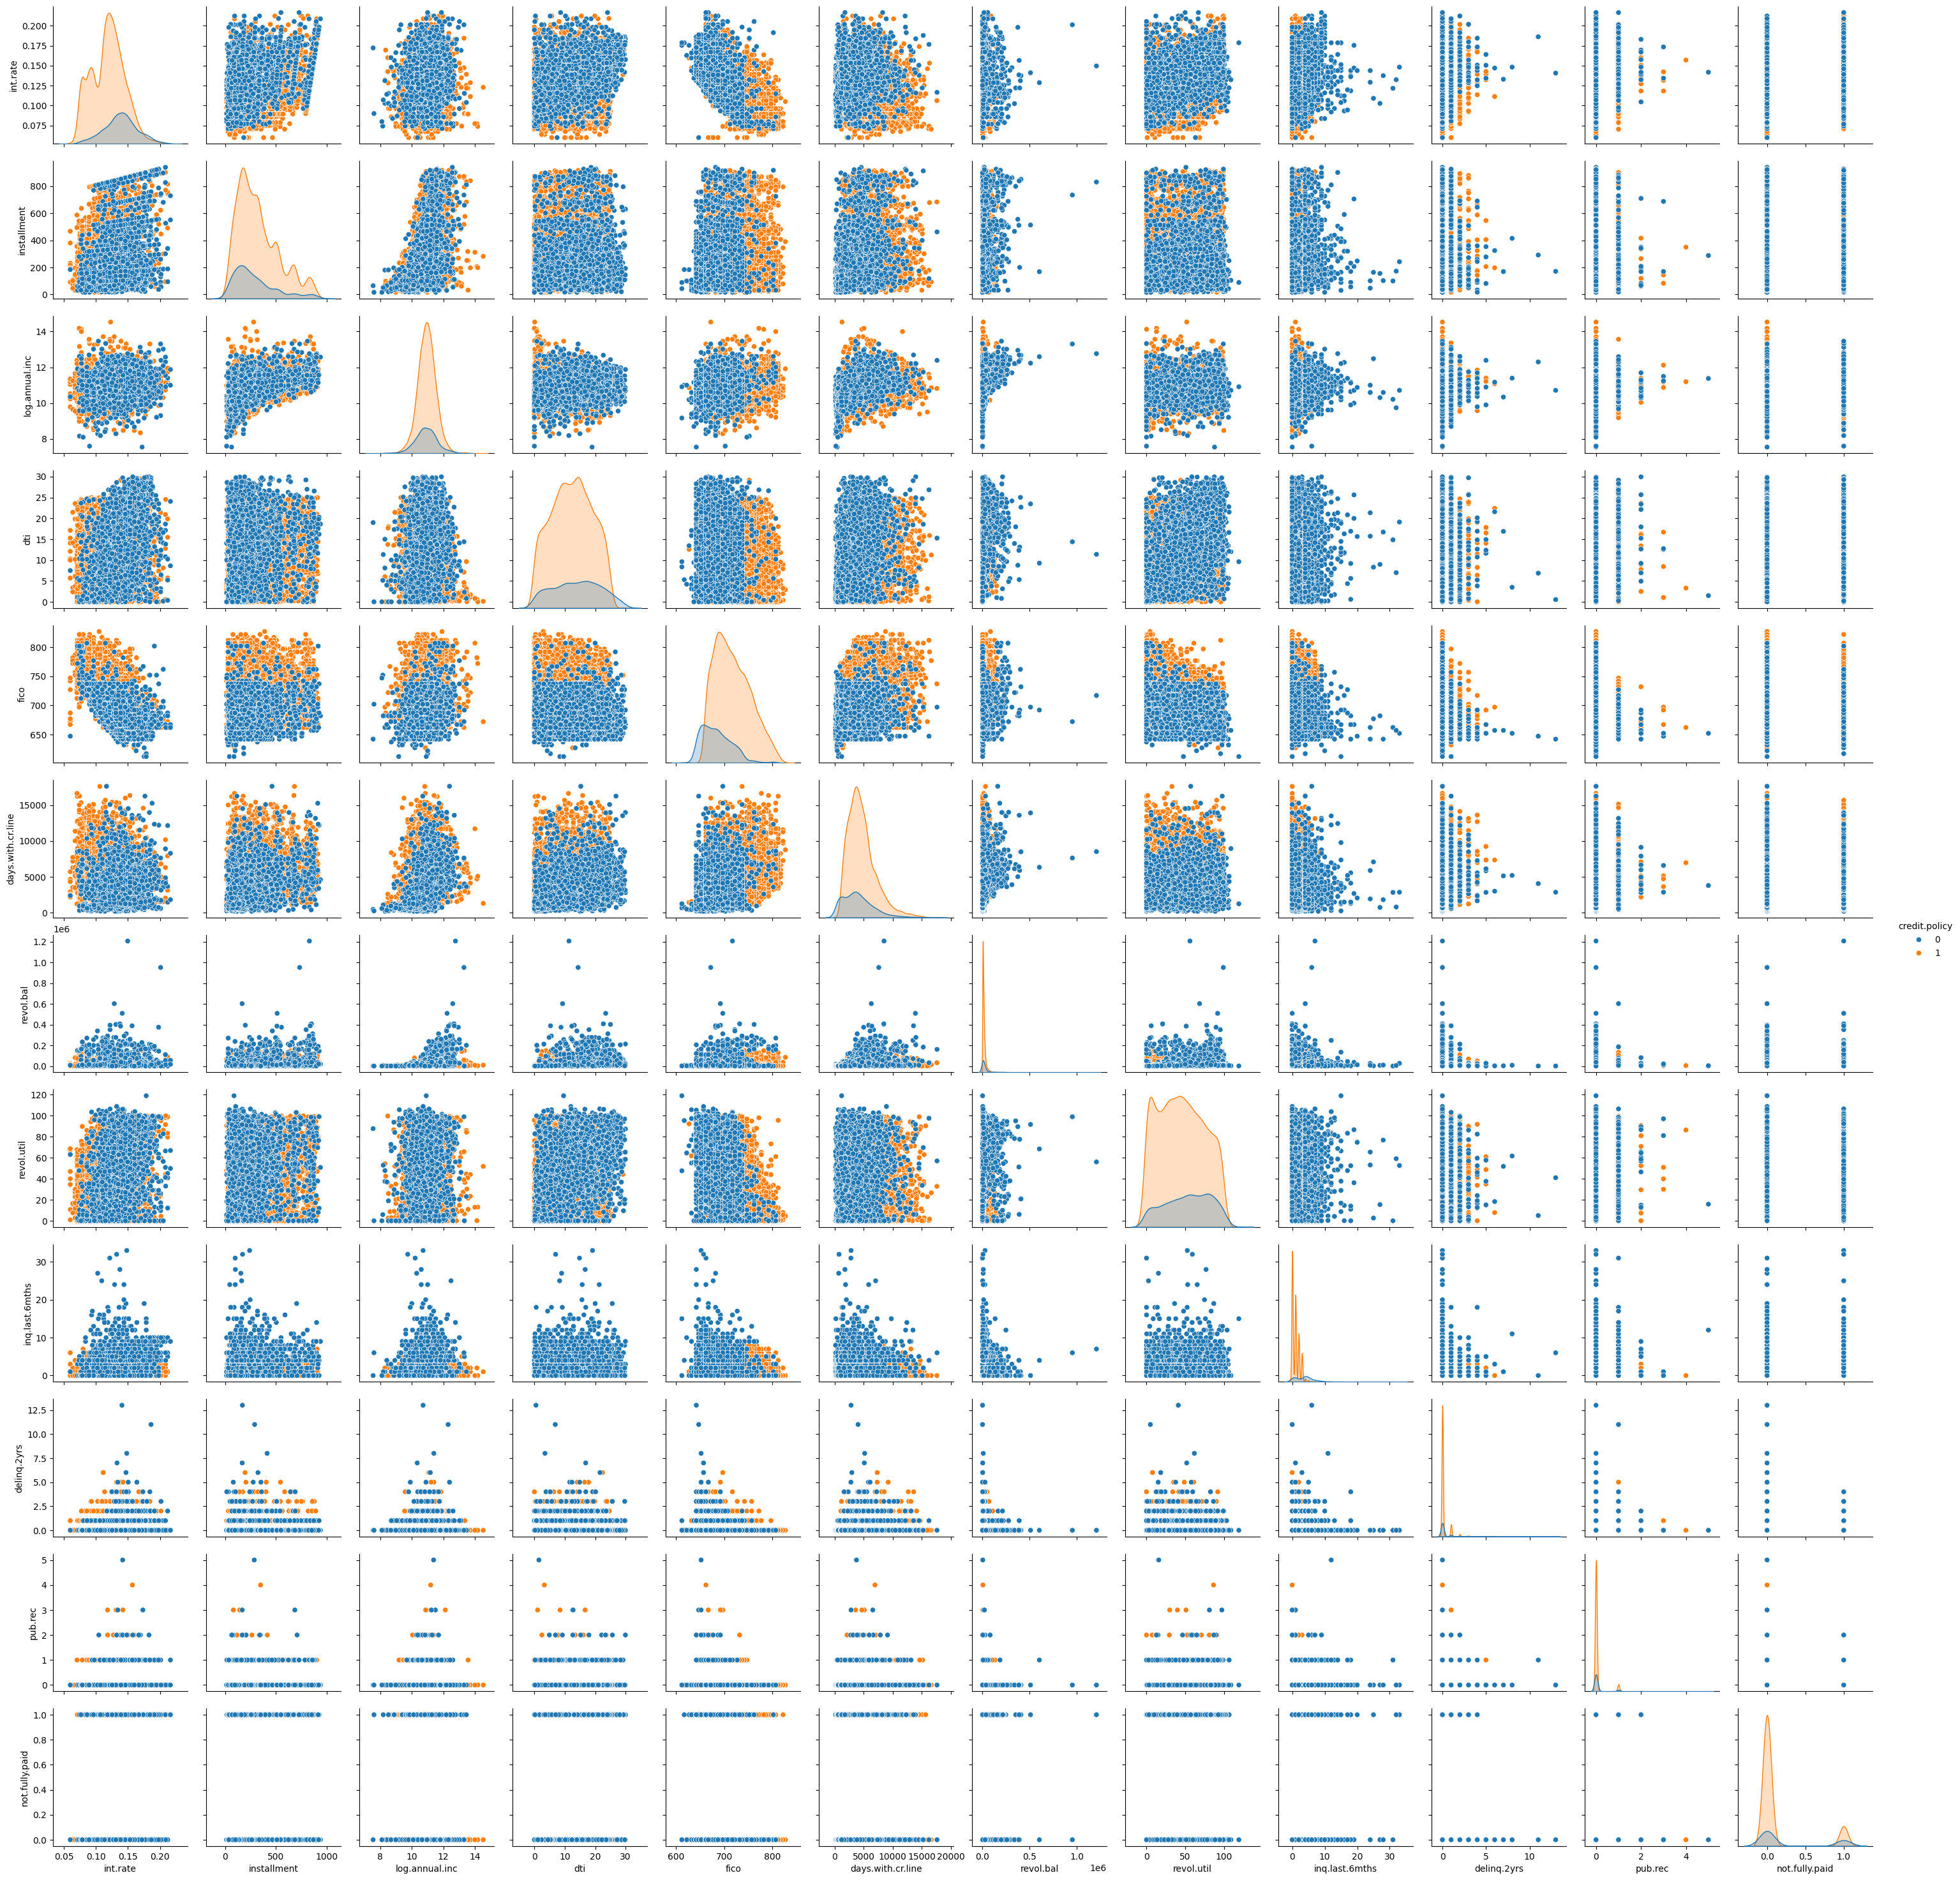

In [8]:
sns.pairplot(loan, hue='credit.policy')

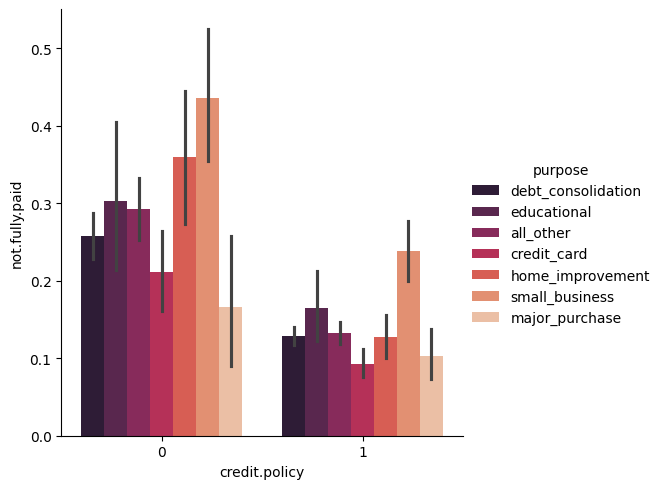

In [9]:
sns.catplot(data=loan, x='credit.policy', y='not.fully.paid', kind='bar', hue='purpose', palette='rocket')

<Axes: xlabel='int.rate', ylabel='Count'>

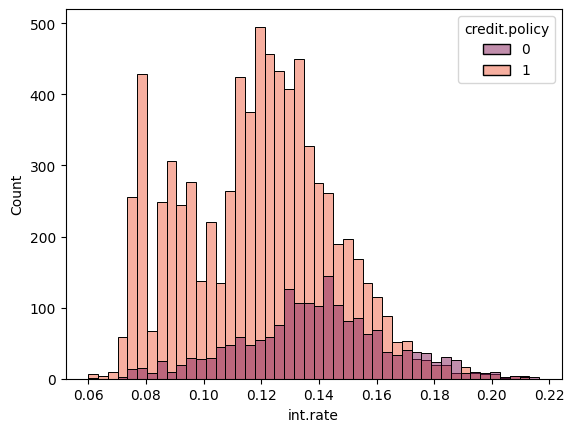

In [10]:
sns.histplot(data=loan, x='int.rate', hue='credit.policy', palette='rocket')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

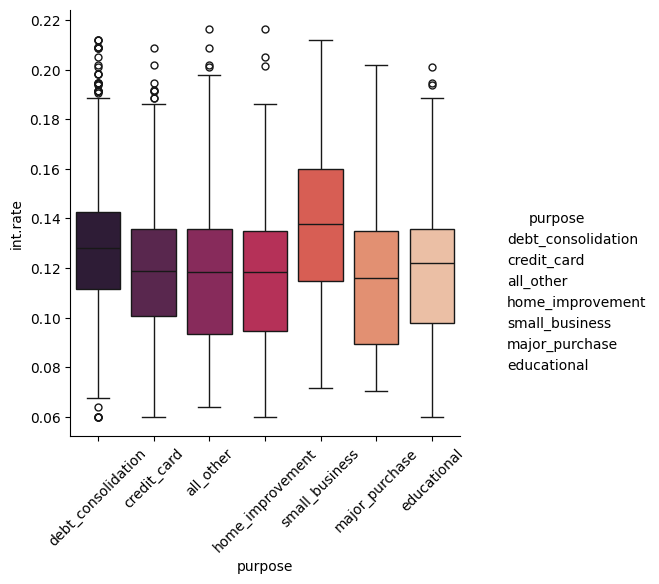

In [11]:
sns.catplot(data=loan, x='purpose', y='int.rate', kind='box', palette='rocket')
plt.xticks(rotation=45)

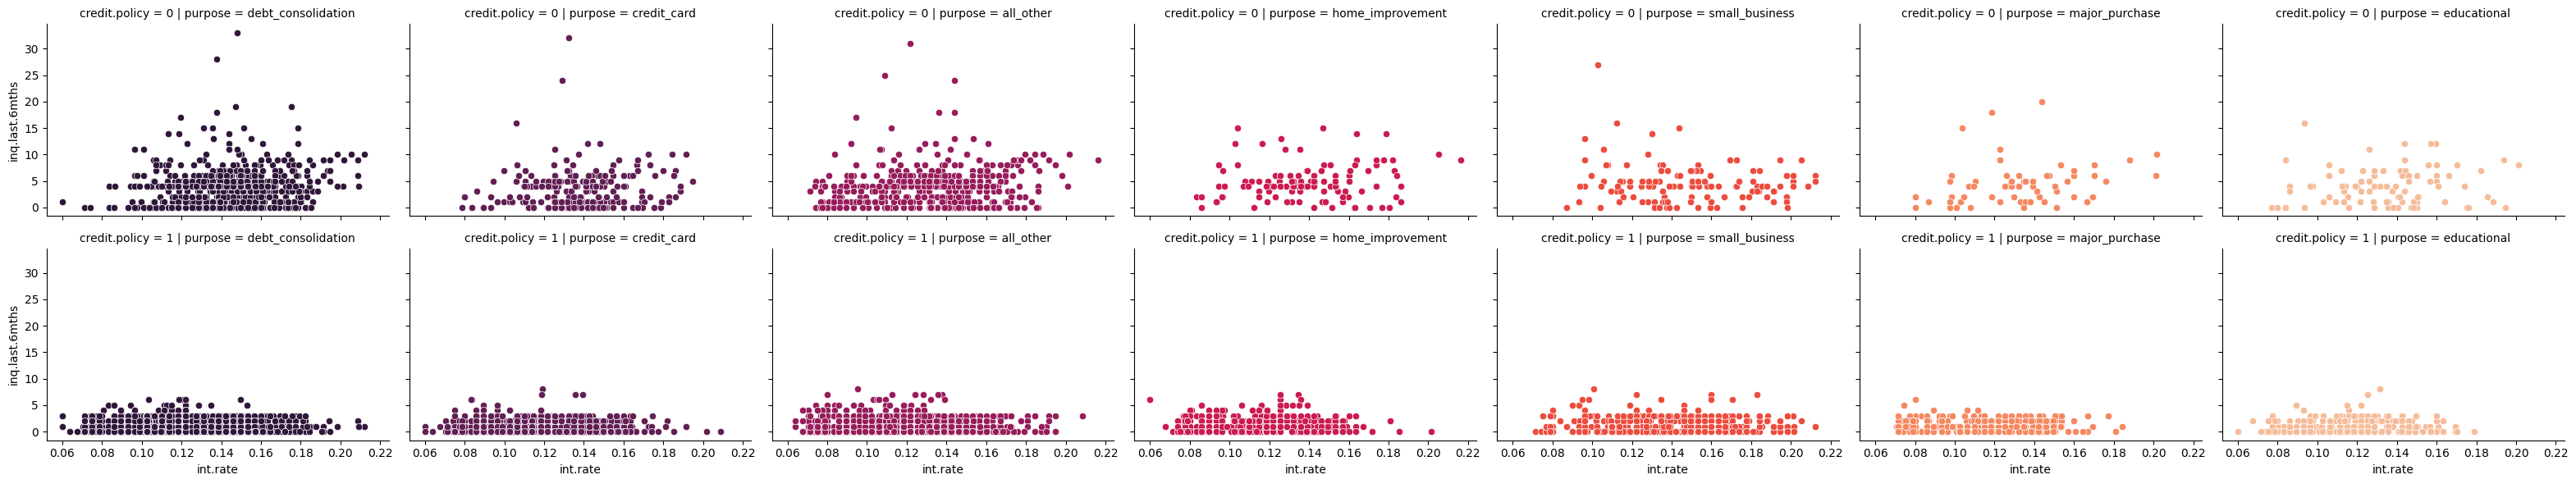

In [12]:
g = sns.FacetGrid(loan, col='purpose', row='credit.policy', hue='purpose', palette='rocket', aspect=1.5)
g.map(sns.scatterplot, 'int.rate', 'inq.last.6mths')


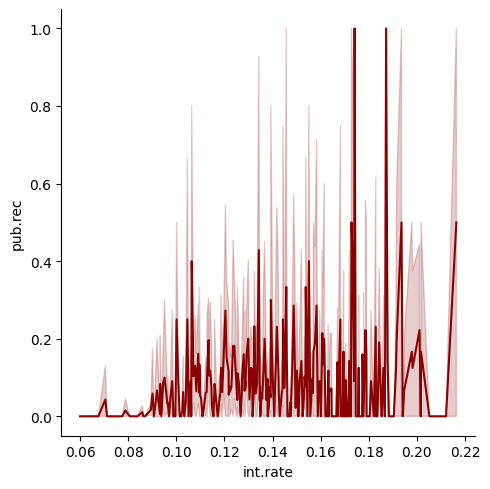

In [13]:
sns.relplot(data=loan, kind='line', x='int.rate', y='pub.rec', color='darkred' )


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<Axes: >

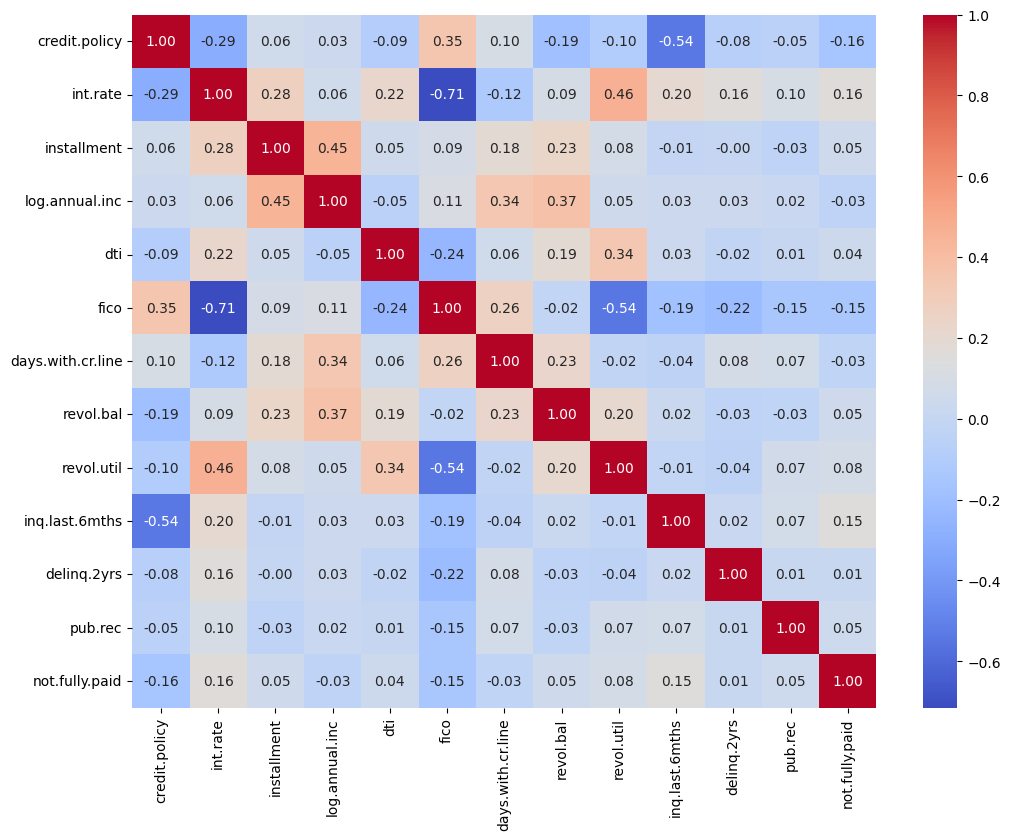

In [15]:
loan_without_purpose = loan.drop(columns=['purpose'])
corr_matrix = loan_without_purpose.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='not.fully.paid', ylabel='count'>

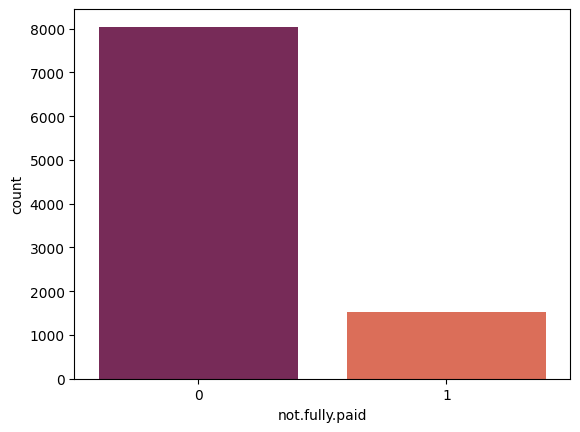

In [16]:
sns.countplot(data=loan, x='not.fully.paid', palette='rocket')

# Preprocessing

In [17]:
"""
loan_test = loan.copy()
loan_test.rename({'credit.policy' : 'credit_pol',
                              'int.rate' : 'intrest_rate',
                              'log.annual.inc' : 'nat_log_annual_income',
                              'dti' : 'dept_to_income',
                              'fico' : 'fico_credit_score',
                              'days.with.cr.line' : 'days_with_credit_line',
                              'revol.bal' : 'unpaid_end_cycle',
                              'revol.util' : 'credit_line_used_relative_credit_avil',
                              'delinq_2yrs' : '30_late_past_year'}, axis=1, inplace=True)
"""

"\nloan_test = loan.copy()\nloan_test.rename({'credit.policy' : 'credit_pol',\n                              'int.rate' : 'intrest_rate',\n                              'log.annual.inc' : 'nat_log_annual_income',\n                              'dti' : 'dept_to_income',\n                              'fico' : 'fico_credit_score',\n                              'days.with.cr.line' : 'days_with_credit_line',\n                              'revol.bal' : 'unpaid_end_cycle',\n                              'revol.util' : 'credit_line_used_relative_credit_avil',\n                              'delinq_2yrs' : '30_late_past_year'}, axis=1, inplace=True)\n"

In [18]:
loan.rename({'credit.policy' : 'credit_pol',
             'int.rate' : 'intrest_rate',
             'log.annual.inc' : 'nat_log_annual_income',
             'dti' : 'dept_to_income',
             'fico' : 'fico_credit_score',
             'days.with.cr.line' : 'days_with_credit_line',
             'revol.bal' : 'unpaid_end_cycle',
             'revol.util' : 'credit_line_used_relative_credit_avil',
             'delinq.2yrs' : '30_late_past_year',
             'pub.rec' : 'pub_rec',
             'inq.last.6mths' : 'inq_last_6mths',
             'not.fully.paid' : 'not_full_paid'}, axis=1, inplace=True)

In [19]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def ordi_encoder(data, col_name):
    ordin_encoder = OrdinalEncoder()
    data[col_name] =  ordin_encoder.fit_transform(data[col_name])
    return data

def lable_encode(data, column_name):
    scaler = LabelEncoder()
    data[column_name] = scaler.fit_transform(data[column_name])
    return data

In [20]:
lable_encode(loan, 'purpose')

credit_pol  purpose  intrest_rate  installment  nat_log_annual_income  \
0              1        2        0.1189       829.10              11.350407   
1              1        1        0.1071       228.22              11.082143   
2              1        2        0.1357       366.86              10.373491   
3              1        2        0.1008       162.34              11.350407   
4              1        1        0.1426       102.92              11.299732   
...          ...      ...           ...          ...                    ...   
9573           0        0        0.1461       344.76              12.180755   
9574           0        0        0.1253       257.70              11.141862   
9575           0        2        0.1071        97.81              10.596635   
9576           0        4        0.1600       351.58              10.819778   
9577           0        2        0.1392       853.43              11.264464   

      dept_to_income  fico_credit_score  days_with_credit_line  \
0              19.48                737            5639.958333   
1              14.29                707            2760.000000   
2              11.63                682            4710.000000   
3               8.10                712            2699.958333   
4              14.97                667            4066.000000   
...              ...                ...                    ...   
9573           10.39                672           10474.000000   
9574            0.21                722            4380.000000   
9575           13.09                687            3450.041667   
9576           19.18                692            1800.000000   
9577           16.28                732            4740.000000   

      unpaid_end_cycle  credit_line_used_relative_credit_avil  inq_last_6mths  \
0                28854                                   52.1               0   
1                33623                                   76.7               0   
2                 3511                                   25.6               1   
3                33667                                   73.2               1   
4                 4740                                   39.5               0   
...                ...                                    ...             ...   
9573            215372                                   82.1               2   
9574               184                                    1.1               5   
9575             10036                                   82.9               8   
9576                 0                                    3.2               5   
9577             37879                                   57.0               6   

      30_late_past_year  pub_rec  not_full_paid  
0                     0        0              0  
1                     0        0              0  
2                     0        0              0  
3                     0        0              0  
4                     1        0              0  
...                 ...      ...            ...  
9573                  0        0              1  
9574                  0        0              1  
9575                  0        0              1  
9576                  0        0              1  
9577                  0        0              1  

[9578 rows x 14 columns]

In [21]:
from imblearn.over_sampling import SMOTENC

X = loan.drop(columns=['not_full_paid'], axis=1)
y = loan['not_full_paid']


categorical_features = [X.columns.get_loc('purpose')]
smoth = SMOTENC(categorical_features=categorical_features,sampling_strategy='not majority' ,random_state=42)

X_sample, y_sample = smoth.fit_resample(X, y)
loan_resample = pd.concat([pd.DataFrame(X_sample, columns=X.columns), pd.DataFrame(y_sample, columns=['not_full_paid'])], axis=1)


<Axes: xlabel='not_full_paid', ylabel='count'>

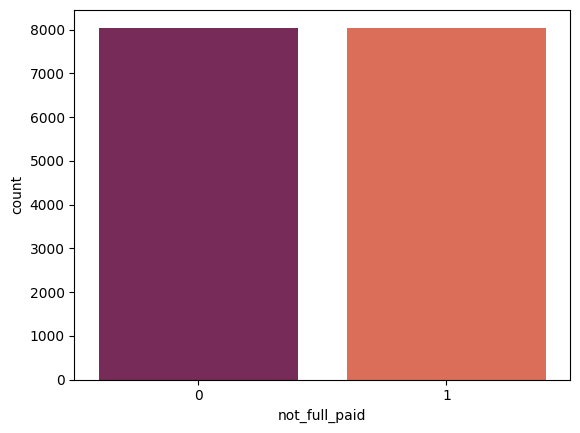

In [22]:
sns.countplot(data=loan_resample, x='not_full_paid', palette='rocket')

<Axes: xlabel='intrest_rate', ylabel='Count'>

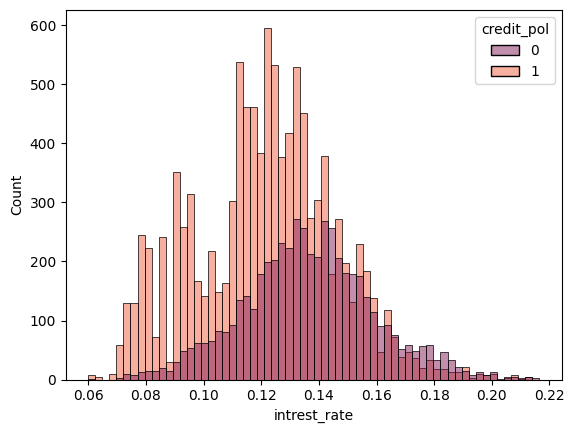

In [23]:
sns.histplot(data=loan_resample, x='intrest_rate', hue='credit_pol', palette='rocket')

# Model selection

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.25, random_state=42)

In [41]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
svc_model = SVC()

def train_model(model):
    for model in [model]:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        train_acc = round(model.score(X_train, y_train)*100, 3)
        test_acc = round(accuracy_score(y_test, y_pred)*100, 3)
        print('The accuracy for the traning set: ', train_acc)
        print('The accuracy for the test set: ', test_acc)
        print('****' * 8)
        return y_pred        
        
        

def matrices(model):
    for model in [model]:
        print(classification_report(y_test, model.predict(X_test)))
        print(confusion_matrix(y_test, model.predict(X_test)))
        print('****' * 8)

In [42]:
rf_prediction = train_model(rf_model)
dt_prediction = train_model(dt_model)
lr_prediction = train_model(lr_model)
scv_prediction = train_model(svc_model)


The accuracy for the traning set:  100.0
The accuracy for the test set:  84.166
********************************
The accuracy for the traning set:  100.0
The accuracy for the test set:  76.709
********************************
The accuracy for the traning set:  58.175
The accuracy for the test set:  58.066
********************************
The accuracy for the traning set:  53.153
The accuracy for the test set:  52.2
********************************


In [43]:
matrices(lr_model)

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      2019
           1       0.58      0.59      0.58      2004

    accuracy                           0.58      4023
   macro avg       0.58      0.58      0.58      4023
weighted avg       0.58      0.58      0.58      4023

[[1162  857]
 [ 830 1174]]
********************************


In [44]:
def cross_val(model, number_folds):
    k_folds = KFold(n_splits=number_folds, shuffle=True, random_state=42)
    cross_result = cross_val_score(model, X_sample, y_sample, cv=k_folds)
    print(f'Cross-Validation Results (Accuracy): {cross_result}')
    print(f'Mean Accuracy: {cross_result.mean()}')

In [45]:
cross_val(lr_model, 10)
cross_val(svc_model, 10)

Cross-Validation Results (Accuracy): [0.57489124 0.57489124 0.56805469 0.57240522 0.54630205 0.54816656
 0.55935364 0.58297079 0.58297079 0.5997514 ]
Mean Accuracy: 0.5709757613424488
Cross-Validation Results (Accuracy): [0.5226849  0.52827843 0.50279677 0.54070851 0.49782474 0.52454941
 0.53946551 0.48912368 0.50466128 0.53760099]
Mean Accuracy: 0.518769422001243


#### RandomForestClassifier
n_estimators:
The number of trees in the random forest.
Increasing the number of trees can improve the performance of the model, but it also increases computational cost.

max_depth:
The maximum depth of the trees in the random forest.
Limiting the depth of the trees can help prevent overfitting by restricting the complexity of individual trees.

min_samples_split:
The minimum number of samples required to split an internal node.
Increasing this value can help prevent overfitting by ensuring that each split has a sufficient number of samples.

min_samples_leaf:
The minimum number of samples required to be at a leaf node.
Increasing this value can prevent overfitting by requiring each leaf node to have a minimum number of samples, thereby preventing overly specific rules.

max_features:
The number of features to consider when looking for the best split.
Limiting the number of features can help prevent overfitting and improve the generalization of the model.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#### DecsionTreeClassifier 
max_depth:
The maximum depth of the tree. Limiting the depth can help prevent overfitting by restricting the complexity of the tree.

min_samples_split:
The minimum number of samples required to split an internal node. Increasing this value can help control overfitting by ensuring that each split has a sufficient number of samples.

min_samples_leaf:
The minimum number of samples required to be at a leaf node. Increasing this value can prevent overfitting by requiring each leaf node to have a minimum number of samples, thereby preventing overly specific rules.

max_features:
The number of features to consider when looking for the best split. Limiting the number of features can help prevent overfitting and improve the generalization of the model.

criterion:
The function to measure the quality of a split. The two options are "gini" for the Gini impurity and "entropy" for the information gain. Experimenting with different criteria can help determine which one works best for your dataset.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#### LogisticRegression

penalty:
Regularization penalty term that can be 'l1' (Lasso regularization) or 'l2' (Ridge regularization).
Lasso regularization can help in feature selection by setting coefficients of less important features to zero.
Ridge regularization can help in handling multicollinearity by penalizing large coefficients.

C:
Inverse of regularization strength.
Smaller values of C indicate stronger regularization, and larger values indicate weaker regularization.
You can try different values of C to control the trade-off between model complexity and overfitting.

solver:
Algorithm to use in the optimization problem.
Different solvers are suitable for different types of problems and datasets.
Common choices include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.

max_iter:
Maximum number of iterations for the optimization algorithm to converge.
It is important to set a sufficiently large value for max_iter to ensure convergence, especially for large datasets or complex problems.

class_weight:
Method to handle class imbalance by assigning different weights to classes.
Options include 'balanced', where classes are automatically weighted inversely proportional to their frequencies, or custom weights can be specified manually.

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
#### SVC(SupportvectorClassifier)

C:
Regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error.
Higher values of C allow the model to fit the training data more closely, potentially leading to overfitting, while lower values encourage a larger margin and may improve generalization.

kernel:
Specifies the kernel type used in the algorithm. Common choices include 'linear', 'poly', 'rbf' (radial basis function), and 'sigmoid'.
Different kernels have different effects on the decision boundary and can perform differently depending on the dataset.

gamma:
Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of individual training samples on the decision boundary.
Higher values of gamma lead to more complex decision boundaries, potentially resulting in overfitting, while lower values create smoother decision boundaries.

degree:
Degree of the polynomial kernel function ('poly'). It specifies the degree of the polynomial kernel function and is ignored by other kernels.
Higher degrees allow the model to capture more complex relationships in the data, but excessively high degrees can lead to overfitting.

class_weight:
Method to handle class imbalance by assigning different weights to classes.
Options include 'balanced', where classes are automatically weighted inversely proportional to their frequencies, or custom weights can be specified manually.


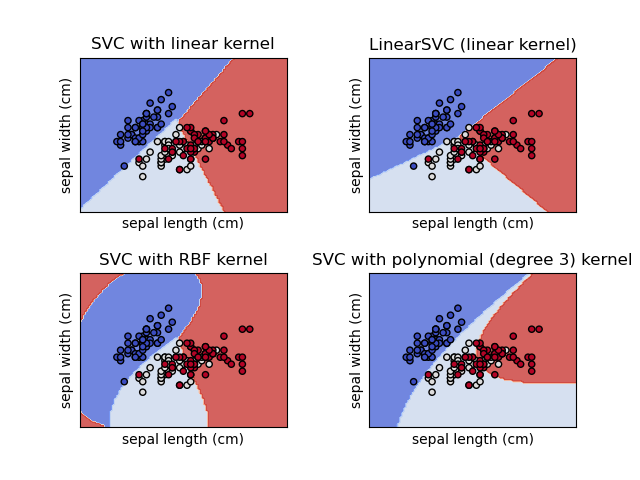

In [46]:
def best_grid_search(model):
    print('Best  parameters found by grid search:', model.best_params_ )
    print('Best score for the model', model.best_score_)
    print('****' * 8)

In [56]:
rf_parm_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']}

rf_grid_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_parm_grid, verbose= 3,cv=10, n_jobs=-1)
rf_grid_model.fit(X_train, y_train)
best_grid_search(rf_grid_model)


Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[CV 5/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 6/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 8/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 7/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score

In [48]:
dt_param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']}

dt_grid_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=10)
dt_grid_model.fit(X_train, y_train)
best_grid_search(dt_grid_model)

Best  parameters found by grid search: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score for the model 0.7212231441522022
********************************


In [37]:
lr_parm_grid = {'max_iter' : [50, 100, 200, 500, 1000, 1500],
                'penalty' : ['l1', 'l2'], 
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'solver' : ['liblinear', 'saga']}

lr_grid_model = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_parm_grid, cv=10)
lr_grid_model.fit(X_train, y_train)
best_grid_search(lr_grid_model)

Best  parameters found by grid search: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for the model 0.6693447976906409
********************************


In [55]:
#svc_param_grid = {
#    'C': [0.1, 1, 10],
#    'kernel': ['linear', 'poly', 'rbf'],
#    'gamma': ['scale', 'auto'],
#    'degree': [2, 3, 4],
#    'class_weight': [None, 'balanced']}

#svc_grid_model = GridSearchCV(SVC(), param_grid=svc_param_grid, cv=10, n_jobs=-1)
#svc_grid_model.fit(X_train, y_train)
#best_grid_search(svc_grid_model)

In [57]:
best_esti_rf = rf_grid_model.best_estimator_

In [50]:
best_esti_dt = dt_grid_model.best_estimator_
best_esti_lr = lr_grid_model.best_estimator_
#best_esti_svc = svc_grid_model.best_estimator_

y_predicted_rf = best_esti_rf.predict(X_test)
y_predicted_dt = best_esti_dt.predict(X_test)
y_predicted_lr = best_esti_lr.predict(X_test)
#y_predicted_svc = best_esti_svc.predict(X_test)

In [58]:
cross_check_res = pd.DataFrame({'Y test' : y_test,
                                'Prediction' : y_predicted_rf})

print(cross_check_res.sample(20))

       Y test  Prediction
14236       1           1
5035        1           0
13936       1           1
9737        1           1
6723        0           0
1315        0           0
6389        0           0
11134       1           1
4344        0           0
12998       1           1
14861       1           1
3776        0           0
4738        0           0
13082       1           0
12724       1           1
1453        0           0
1621        0           0
13346       1           1
2455        0           0
9830        1           1
